In [0]:
import pandas as pd
from scipy.io import arff
import numpy as np

In [0]:
PATH_DATA = '/content/emotions.arff'

data = arff.loadarff(PATH_DATA)

df = pd.DataFrame(data[0])

In [25]:
df.head()

,Mean_Acc1298_Mean_Mem40_Centroid,Mean_Acc1298_Mean_Mem40_Rolloff,Mean_Acc1298_Mean_Mem40_Flux,Mean_Acc1298_Mean_Mem40_MFCC_0,Mean_Acc1298_Mean_Mem40_MFCC_1,Mean_Acc1298_Mean_Mem40_MFCC_2,Mean_Acc1298_Mean_Mem40_MFCC_3,Mean_Acc1298_Mean_Mem40_MFCC_4,Mean_Acc1298_Mean_Mem40_MFCC_5,Mean_Acc1298_Mean_Mem40_MFCC_6,Mean_Acc1298_Mean_Mem40_MFCC_7,Mean_Acc1298_Mean_Mem40_MFCC_8,Mean_Acc1298_Mean_Mem40_MFCC_9,Mean_Acc1298_Mean_Mem40_MFCC_10,Mean_Acc1298_Mean_Mem40_MFCC_11,Mean_Acc1298_Mean_Mem40_MFCC_12,Mean_Acc1298_Std_Mem40_Centroid,Mean_Acc1298_Std_Mem40_Rolloff,Mean_Acc1298_Std_Mem40_Flux,Mean_Acc1298_Std_Mem40_MFCC_0,Mean_Acc1298_Std_Mem40_MFCC_1,Mean_Acc1298_Std_Mem40_MFCC_2,Mean_Acc1298_Std_Mem40_MFCC_3,Mean_Acc1298_Std_Mem40_MFCC_4,Mean_Acc1298_Std_Mem40_MFCC_5,Mean_Acc1298_Std_Mem40_MFCC_6,Mean_Acc1298_Std_Mem40_MFCC_7,Mean_Acc1298_Std_Mem40_MFCC_8,Mean_Acc1298_Std_Mem40_MFCC_9,Mean_Acc1298_Std_Mem40_MFCC_10,Mean_Acc1298_Std_Mem40_MFCC_11,Mean_Acc1298_Std_Mem40_MFCC_12,Std_Acc1298_Mean_Mem40_Centroid,Std_Acc1298_Mean_Mem40_Rolloff,Std_Acc1298_Mean_Mem40_Flux,Std_Acc1298_Mean_Mem40_MFCC_0,Std_Acc1298_Mean_Mem40_MFCC_1,Std_Acc1298_Mean_Mem40_MFCC_2,Std_Acc1298_Mean_Mem40_MFCC_3,Std_Acc1298_Mean_Mem40_MFCC_4,Std_Acc1298_Mean_Mem40_MFCC_5,Std_Acc1298_Mean_Mem40_MFCC_6,Std_Acc1298_Mean_Mem40_MFCC_7,Std_Acc1298_Mean_Mem40_MFCC_8,Std_Acc1298_Mean_Mem40_MFCC_9,Std_Acc1298_Mean_Mem40_MFCC_10,Std_Acc1298_Mean_Mem40_MFCC_11,Std_Acc1298_Mean_Mem40_MFCC_12,Std_Acc1298_Std_Mem40_Centroid,Std_Acc1298_Std_Mem40_Rolloff,Std_Acc1298_Std_Mem40_Flux,Std_Acc1298_Std_Mem40_MFCC_0,Std_Acc1298_Std_Mem40_MFCC_1,Std_Acc1298_Std_Mem40_MFCC_2,Std_Acc1298_Std_Mem40_MFCC_3,Std_Acc1298_Std_Mem40_MFCC_4,Std_Acc1298_Std_Mem40_MFCC_5,Std_Acc1298_Std_Mem40_MFCC_6,Std_Acc1298_Std_Mem40_MFCC_7,Std_Acc1298_Std_Mem40_MFCC_8,Std_Acc1298_Std_Mem40_MFCC_9,Std_Acc1298_Std_Mem40_MFCC_10,Std_Acc1298_Std_Mem40_MFCC_11,Std_Acc1298_Std_Mem40_MFCC_12,BH_LowPeakAmp,BH_LowPeakBPM,BH_HighPeakAmp,BH_HighPeakBPM,BH_HighLowRatio,BHSUM1,BHSUM2,BHSUM3,amazed-suprised,happy-pleased,relaxing-calm,quiet-still,sad-lonely,angry-aggresive
0,0.034741,0.089665,0.091225,-73.302422,6.215179,0.615074,2.037160,0.804065,1.301409,0.558576,0.672063,0.783788,0.766640,0.458712,0.530384,0.812429,0.028851,0.129039,0.039614,5.762173,1.636819,1.170034,1.051511,0.764163,0.642705,0.617868,0.510265,0.566213,0.509149,0.477275,0.505073,0.463535,0.013519,0.050591,0.009025,8.156257,1.077167,0.624711,0.810244,0.399568,0.279947,0.314215,0.231439,0.345401,0.285389,0.210613,0.321896,0.290551,0.022774,0.095801,0.015057,4.748694,0.536378,0.296306,0.273210,0.175800,0.105508,0.168246,0.115849,0.136020,0.110514,0.100517,0.118630,0.094923,0.051035,68.0,0.014937,136.0,2.0,0.245457,0.105065,0.405399,b'0',b'1',b'1',b'0',b'0',b'0'
1,0.081374,0.272747,0.085733,-62.584437,3.183163,-0.218145,0.163038,0.620251,0.458514,0.041426,0.308287,0.538152,0.594871,0.734332,0.415489,0.761508,0.066288,0.262370,0.034438,3.480874,1.596532,0.943803,0.804444,0.511229,0.498670,0.523039,0.480916,0.488657,0.483166,0.445187,0.415994,0.405593,0.013621,0.073041,0.010094,1.243981,0.829790,0.252972,0.347831,0.205087,0.168601,0.178009,0.144080,0.178703,0.146937,0.125580,0.128202,0.107007,0.020028,0.066940,0.029483,3.963534,0.382360,0.168389,0.117525,0.098341,0.087046,0.057991,0.059393,0.059457,0.053439,0.067684,0.070075,0.041565,0.295031,70.0,0.276366,140.0,2.0,0.343547,0.276366,0.710924,b'1',b'0',b'0',b'0',b'0',b'1'
2,0.110545,0.273567,0.084410,-65.235325,2.794964,0.639047,1.281297,0.757896,0.489412,0.627636,0.469322,0.644336,0.441556,0.335964,0.290713,0.158538,0.082743,0.215373,0.035970,4.834742,1.213443,0.864034,0.909222,0.780572,0.550833,0.639740,0.573309,0.526312,0.562622,0.538407,0.492292,0.455562,0.029112,0.070433,0.008525,2.759906,0.592634,0.761852,0.568740,0.589827,0.281181,0.437752,0.479889,0.227320,0.296224,0.273855,0.191804,0.198025,0.038119,0.065427,0.029622,3.371796,0.430373,0.172862,0.177523,0.184333,0.095718,0.139323,0.109279,0.090650,

In [26]:
print("######### VALORES NULOS  ######## \n")
print(df.isnull().sum())

######### VALORES NULOS  ######## 

Mean_Acc1298_Mean_Mem40_Centroid    0
Mean_Acc1298_Mean_Mem40_Rolloff     0
Mean_Acc1298_Mean_Mem40_Flux        0
Mean_Acc1298_Mean_Mem40_MFCC_0      0
Mean_Acc1298_Mean_Mem40_MFCC_1      0
                                   ..
happy-pleased                       0
relaxing-calm                       0
quiet-still                         0
sad-lonely                          0
angry-aggresive                     0
Length: 78, dtype: int64


In [27]:
print("######### VALORES DUPLICADOS #######\n")
print(df.duplicated())

######### VALORES DUPLICADOS #######

0      False
1      False
2      False
3      False
4      False
       ...  
588    False
589    False
590    False
591    False
592    False
Length: 593, dtype: bool


# **Normalizando**

In [0]:
from sklearn import preprocessing

class_name = ['amazed-suprised',
'happy-pleased',
'relaxing-calm',
'quiet-still',
'sad-lonely',
'angry-aggresive']

In [0]:
for col in df.columns: 
    if col not in class_name:
        x_train = np.array(0)
        x_train = df[col]
        x_nomalized = preprocessing.normalize([x_train])
        df[col] = x_nomalized[0]

# **Correlação**

In [0]:
corr_matrix = df.corr().abs()

# matriz de triangulo superior
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

# pegando os indices com correlação maior que 0.80
to_drop = [column for column in upper.columns if any(upper[column] > 0.80)]

In [0]:
df_semCorrelação = df.drop(df[to_drop], axis=1)

In [32]:
df_semCorrelação

,Mean_Acc1298_Mean_Mem40_Centroid,Mean_Acc1298_Mean_Mem40_Rolloff,Mean_Acc1298_Mean_Mem40_Flux,Mean_Acc1298_Mean_Mem40_MFCC_0,Mean_Acc1298_Mean_Mem40_MFCC_1,Mean_Acc1298_Mean_Mem40_MFCC_2,Mean_Acc1298_Mean_Mem40_MFCC_3,Mean_Acc1298_Mean_Mem40_MFCC_4,Mean_Acc1298_Mean_Mem40_MFCC_5,Mean_Acc1298_Mean_Mem40_MFCC_6,Mean_Acc1298_Mean_Mem40_MFCC_7,Mean_Acc1298_Mean_Mem40_MFCC_8,Mean_Acc1298_Mean_Mem40_MFCC_9,Mean_Acc1298_Mean_Mem40_MFCC_10,Mean_Acc1298_Mean_Mem40_MFCC_11,Mean_Acc1298_Mean_Mem40_MFCC_12,Mean_Acc1298_Std_Mem40_Centroid,Mean_Acc1298_Std_Mem40_MFCC_0,Mean_Acc1298_Std_Mem40_MFCC_1,Mean_Acc1298_Std_Mem40_MFCC_2,Mean_Acc1298_Std_Mem40_MFCC_3,Mean_Acc1298_Std_Mem40_MFCC_8,Mean_Acc1298_Std_Mem40_MFCC_9,Std_Acc1298_Mean_Mem40_Centroid,Std_Acc1298_Mean_Mem40_Rolloff,Std_Acc1298_Mean_Mem40_Flux,Std_Acc1298_Mean_Mem40_MFCC_0,Std_Acc1298_Mean_Mem40_MFCC_1,Std_Acc1298_Mean_Mem40_MFCC_2,Std_Acc1298_Mean_Mem40_MFCC_3,Std_Acc1298_Mean_Mem40_MFCC_4,Std_Acc1298_Mean_Mem40_MFCC_5,Std_Acc1298_Mean_Mem40_MFCC_6,Std_Acc1298_Mean_Mem40_MFCC_7,Std_Acc1298_Mean_Mem40_MFCC_9,Std_Acc1298_Std_Mem40_Centroid,Std_Acc1298_Std_Mem40_Rolloff,Std_Acc1298_Std_Mem40_Flux,Std_Acc1298_Std_Mem40_MFCC_0,Std_Acc1298_Std_Mem40_MFCC_1,Std_Acc1298_Std_Mem40_MFCC_2,Std_Acc1298_Std_Mem40_MFCC_3,Std_Acc1298_Std_Mem40_MFCC_4,Std_Acc1298_Std_Mem40_MFCC_5,Std_Acc1298_Std_Mem40_MFCC_6,Std_Acc1298_Std_Mem40_MFCC_7,Std_Acc1298_Std_Mem40_MFCC_8,Std_Acc1298_Std_Mem40_MFCC_9,Std_Acc1298_Std_Mem40_MFCC_10,BH_LowPeakAmp,BH_LowPeakBPM,BH_HighPeakBPM,BH_HighLowRatio,amazed-suprised,happy-pleased,relaxing-calm,quiet-still,sad-lonely,angry-aggresive
0,0.018763,0.016149,0.043463,-0.041016,0.047331,0.021373,0.046482,0.042515,0.058628,0.038775,0.044554,0.058590,0.055764,0.035826,0.044299,0.068257,0.021723,0.048957,0.049430,0.049055,0.053520,0.044277,0.040537,0.021159,0.029441,0.044803,0.082391,0.047352,0.037992,0.061658,0.039579,0.032049,0.037665,0.027924,0.034880,0.031352,0.055758,0.020917,0.046671,0.051209,0.047828,0.052492,0.044358,0.033350,0.056821,0.039504,0.045909,0.036780,0.034219,0.005595,0.036803,0.035337,0.038684,b'0',b'1',b'1',b'0',b'0',b'0'
1,0.043948,0.049122,0.040846,-0.035019,0.024241,-0.007580,0.003720,0.032795,0.020656,0.002876,0.020438,0.040228,0.043270,0.057352,0.034703,0.063979,0.049910,0.029574,0.048214,0.039570,0.040945,0.038212,0.038469,0.021319,0.042506,0.050110,0.012566,0.036477,0.015385,0.026469,0.020315,0.019302,0.021338,0.017384,0.017958,0.027572,0.038960,0.040957,0.038954,0.036504,0.027181,0.022580,0.024814,0.027514,0.019585,0.020253,0.020068,0.017785,0.023042,0.032346,0.037886,0.036376,0.038684,b'1',b'0',b'0',b'0',b'0',b'1'
2,0.059703,0.049270,0.040216,-0.036502,0.021285,0.022206,0.029236,0.040073,0.022048,0.043569,0.031114,0.048166,0.032118,0.026239,0.024281,0.013320,0.062299,0.041077,0.036645,0.036225,0.046278,0.041156,0.044795,0.045564,0.040988,0.042321,0.027879,0.026052,0.046332,0.043280,0.058425,0.032191,0.052473,0.057900,0.036204,0.052477,0.038080,0.041151,0.033139,0.041088,0.027903,0.034108,0.046512,0.030255,0.047053,0.037263,0.030596,0.039234,0.034333,0.017714,0.033015,0.047548,0.058026,b'0',b'1',b'0',b'0',b'0',b'1'
3,0.022943,0.035891,0.044521,-0.044934,0.044355,0.022546,0.040041,0.079076,0.033333,0.056204,0.030558,0.030616,0.049470,0.046111,0.040206,0.052254,0.037600,0.057091,0.041608,0.053068,0.050195,0.054705,0.046017,0.032475,0.061871,0.045215,0.040329,0.028856,0.056418,0.043370,0.037533,0.060758,0.038095,0.037215,0.032198,0.044987,0.069539,0.039879,0.040542,0.044041,0.045318,0.047285,0.036033,0.058052,0.042013,0.053029,0.056403,0.037865,0.038406,0.004716,0.035721,0.034297,0.038684,b'0',b'0',b'1',b'0',b'0',b'0'
4,0.040263,0.025373,0.038014,-0.052428,0.042214,0.036981,0.020516,0.047076,0.031640,0.034062,0.052831,0.055718,0.066281,0.046425,0.037935,0.032332,0.026918,0.040402,0.033711,0.038856,0.032320,0.054439,0.051641,0.073583,0.079717,0.051410,0.077915,0.070012,0.062469,0.045005,0.056030,0.060037,0.066468,0.073139,0.072955,0.049768,0.051067

In [0]:
le = preprocessing.LabelEncoder() #transforma atributos qualitativos em quantitativos
for column in df_semCorrelação.columns:
    if df_semCorrelação[column].dtypes == 'object':
        df_semCorrelação[column] = le.fit_transform(df_semCorrelação[column])

# **Categorias das músicas**

In [0]:
classe = []

for i in range(len(df)):
    classe.append('')

for i in range(len(df)):
    if df_semCorrelação['amazed-suprised'][i] == 1:
        classe[i] = classe[i] + 'suprised'
    if df_semCorrelação['happy-pleased'][i] == 1:
        classe[i] = classe[i] + 'happy'
    if df_semCorrelação['relaxing-calm'][i] == 1:
        classe[i] = classe[i] + 'relaxing'    
    if df_semCorrelação['quiet-still'][i] == 1:
        classe[i] = classe[i] + 'quiet'
    if df_semCorrelação['sad-lonely'][i] == 1:
        classe[i] = classe[i] + 'sad'
    if df_semCorrelação['angry-aggresive'][i] == 1:
        classe[i] = classe[i] + 'aggresive'        

In [0]:
df_semCorrelação = df_semCorrelação.drop(df_semCorrelação[class_name], axis=1)

In [0]:
df_semCorrelação['Classe'] = classe

# **Balanceamento**

In [37]:
df_semCorrelação['Classe'].value_counts()

suprisedaggresive         81
happyrelaxing             74
aggresive                 72
relaxingquietsad          67
relaxing                  42
suprisedhappy             38
quietsad                  37
relaxingquiet             30
relaxingsad               25
suprised                  24
happy                     23
sad                       12
sadaggresive              12
suprisedhappyrelaxing     11
suprisedhappyaggresive     7
happyrelaxingquiet         6
suprisedsad                6
happyaggresive             5
quiet                      5
suprisedsadaggresive       4
relaxingsadaggresive       3
relaxingaggresive          3
suprisedrelaxing           2
quietsadaggresive          1
happysad                   1
happyquiet                 1
relaxingquietaggresive     1
Name: Classe, dtype: int64

In [0]:
index = []

out =[ 
'suprisedhappyaggresive',
'happyrelaxingquiet',
'suprisedsad',
'quiet',
'happyaggresive',
'suprisedsadaggresive',
'relaxingsadaggresive',
'relaxingaggresive',
'suprisedrelaxing',
'relaxingquietaggresive',
'happyquiet',
'quietsadaggresive',
'happysad']

for i in range(len(df_semCorrelação)):
    if df_semCorrelação['Classe'][i] in out:
        index.append(i)

In [0]:
df_semCorrelação = df_semCorrelação.drop(index)

# **Oversampling**

In [40]:
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler

X = df_semCorrelação[df_semCorrelação.columns[:-1]].values
y = df_semCorrelação['Classe'].values

ros = RandomOverSampler(random_state=0)
ros.fit(X, y)
X_resampled, y_resampled = ros.fit_sample(X, y)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [0]:
df = pd.DataFrame(data = X_resampled , columns = df_semCorrelação.columns[:-1] )
df['Classe'] = y_resampled
df['Classe'] = le.fit_transform(df['Classe'])

# **KNN**

In [0]:
from sklearn import cluster, neighbors, svm, metrics, preprocessing

In [0]:
trainSample = df.sample(frac=0.8, random_state = 1) #80% da base para treinamento
testSample = pd.concat([df, trainSample]).drop_duplicates(keep=False) #concatena a base original com a base de treinamento e exclui os duplicados, sobrando a amostra de teste

trainTarget = trainSample["Classe"] #tributo alvo
testTarget = testSample["Classe"]

del testSample["Classe"]
del trainSample["Classe"]

In [0]:
knn = neighbors.KNeighborsClassifier(n_neighbors=17, algorithm="auto")
knn.fit(trainSample, trainTarget)
resultKNN = knn.predict(testSample)

# **Medidas de análise de desempenho**

  - Medida f1 (Taxa positiva falsa (False Positive Rate))
  
  - Sensibilidade (Sensitivity) / Recall
  - Precisão (Accuracy)
  - Sensibilidade
  - Especificidade

In [0]:
print("\n ######## K-NN #########\n")

matrizConfusao = metrics.confusion_matrix(testTarget, resultKNN)
print("Matriz de Confusão:\n", matrizConfusao)

TP = matrizConfusao[1, 1] #Verdadeiros Positivos
TN = matrizConfusao[0, 0] #Verdadeiros Negativos
FP = matrizConfusao[0, 1] #Falsos Positivos
FN = matrizConfusao[1, 0] #Falsos Negativos

#Formulas obtidas pela matriz de confusão
acc = (TP + TN) / float(TP + TN + FP + FN)
medf1 = FP / float(TN + FP)
sense = metrics.recall_score(testTarget, resultKNN, average='micro')
especify = TN / float(TN + FP)

print("Precisão: ", acc)
print("Medida F1: ", medf1)
print("Sensibilidade: %.2f" % sense)
print("Especificidade: ", especify)

print("\n\n")

# **Rede neural**

In [43]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation
from tensorflow.keras.models import model_from_json

In [64]:
#Usando 20% para teste
test_dataset = df.sample(frac=0.2)

train_dataset = df.drop(test_dataset.index)

# Classe q sera predita
y_train = train_dataset["Classe"]
y_test = test_dataset["Classe"]

x_train = train_dataset.drop(columns=["Classe"])
x_test = test_dataset.drop(columns=["Classe"])

x_train.sample()

,Mean_Acc1298_Mean_Mem40_Centroid,Mean_Acc1298_Mean_Mem40_Rolloff,Mean_Acc1298_Mean_Mem40_Flux,Mean_Acc1298_Mean_Mem40_MFCC_0,Mean_Acc1298_Mean_Mem40_MFCC_1,Mean_Acc1298_Mean_Mem40_MFCC_2,Mean_Acc1298_Mean_Mem40_MFCC_3,Mean_Acc1298_Mean_Mem40_MFCC_4,Mean_Acc1298_Mean_Mem40_MFCC_5,Mean_Acc1298_Mean_Mem40_MFCC_6,Mean_Acc1298_Mean_Mem40_MFCC_7,Mean_Acc1298_Mean_Mem40_MFCC_8,Mean_Acc1298_Mean_Mem40_MFCC_9,Mean_Acc1298_Mean_Mem40_MFCC_10,Mean_Acc1298_Mean_Mem40_MFCC_11,Mean_Acc1298_Mean_Mem40_MFCC_12,Mean_Acc1298_Std_Mem40_Centroid,Mean_Acc1298_Std_Mem40_MFCC_0,Mean_Acc1298_Std_Mem40_MFCC_1,Mean_Acc1298_Std_Mem40_MFCC_2,Mean_Acc1298_Std_Mem40_MFCC_3,Mean_Acc1298_Std_Mem40_MFCC_8,Mean_Acc1298_Std_Mem40_MFCC_9,Std_Acc1298_Mean_Mem40_Centroid,Std_Acc1298_Mean_Mem40_Rolloff,Std_Acc1298_Mean_Mem40_Flux,Std_Acc1298_Mean_Mem40_MFCC_0,Std_Acc1298_Mean_Mem40_MFCC_1,Std_Acc1298_Mean_Mem40_MFCC_2,Std_Acc1298_Mean_Mem40_MFCC_3,Std_Acc1298_Mean_Mem40_MFCC_4,Std_Acc1298_Mean_Mem40_MFCC_5,Std_Acc1298_Mean_Mem40_MFCC_6,Std_Acc1298_Mean_Mem40_MFCC_7,Std_Acc1298_Mean_Mem40_MFCC_9,Std_Acc1298_Std_Mem40_Centroid,Std_Acc1298_Std_Mem40_Rolloff,Std_Acc1298_Std_Mem40_Flux,Std_Acc1298_Std_Mem40_MFCC_0,Std_Acc1298_Std_Mem40_MFCC_1,Std_Acc1298_Std_Mem40_MFCC_2,Std_Acc1298_Std_Mem40_MFCC_3,Std_Acc1298_Std_Mem40_MFCC_4,Std_Acc1298_Std_Mem40_MFCC_5,Std_Acc1298_Std_Mem40_MFCC_6,Std_Acc1298_Std_Mem40_MFCC_7,Std_Acc1298_Std_Mem40_MFCC_8,Std_Acc1298_Std_Mem40_MFCC_9,Std_Acc1298_Std_Mem40_MFCC_10,BH_LowPeakAmp,BH_LowPeakBPM,BH_HighPeakBPM,BH_HighLowRatio
21,0.064168,0.050917,0.046749,-0.040872,0.025324,0.029306,0.044292,0.045983,0.018502,0.068387,0.029492,0.028125,0.023537,0.028562,0.050167,0.033269,0.082657,0.053393,0.060062,0.071759,0.06392,0.046812,0.047189,0.088815,0.065074,0.047503,0.035673,0.034992,0.041784,0.040774,0.052633,0.045993,0.034648,0.026293,0.026717,0.077909,0.040409,0.0395,0.03693,0.048221,0.054539,0.051883,0.060506,0.046829,0.051591,0.051233,0.035645,0.031348,0.036712,0.000943,0.04871,0.046769,0.038684


In [45]:
# Definindo modelo
model = Sequential()
model.add(Dense(38, activation='relu', input_dim = 53))
model.add(Dropout(0.5))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(64, activation='relu'))
model.add(Dense(14, activation='softmax'))

Instructions for updating:
If using Keras pass *_constraint arguments to layers.


In [46]:
# compile the keras model
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
history = model.fit(x_train,y_train, epochs=1500, batch_size=20, validation_data=(x_test, y_test))

Train on 907 samples, validate on 227 samples
Epoch 1/1500
907/907 [==============================] - 0s 456us/sample - loss: 2.6413 - acc: 0.0639 - val_loss: 2.6404 - val_acc: 0.0529
Epoch 2/1500
907/907 [==============================] - 0s 117us/sample - loss: 2.6370 - acc: 0.0838 - val_loss: 2.6377 - val_acc: 0.0396
Epoch 3/1500
907/907 [==============================] - 0s 124us/sample - loss: 2.6306 - acc: 0.0926 - val_loss: 2.6288 - val_acc: 0.0881
Epoch 4/1500
907/907 [==============================] - 0s 131us/sample - loss: 2.6228 - acc: 0.0849 - val_loss: 2.6077 - val_acc: 0.0881
Epoch 5/1500
907/907 [==============================] - 0s 120us/sample - loss: 2.5931 - acc: 0.1147 - val_loss: 2.5575 - val_acc: 0.0837
Epoch 6/1500
907/907 [==============================] - 0s 119us/sample - loss: 2.5306 - acc: 0.1279 - val_loss: 2.4516 - val_acc: 0.1498
Epoch 7/1500
907/907 [==============================] - 0s 131us/sample - loss: 2.4604 - acc: 0.1433 - val_loss: 2.3633 - val_

In [0]:
# Abrindo o modelo JSON e salvando
def save(model):
    model_json = model.to_json()
    with open("model.json", "w") as json_file:
        json_file.write(model_json)
    # serialize weights to HDF5
    model.save_weights("model.h5")
    print("Saved model to disk")

In [0]:
# Carregando e criando o modelo 
def load(modelname,wname):
    json_file = open(modelname, 'r')
    loaded_model_json = json_file.read()
    json_file.close()
    loaded_model = model_from_json(loaded_model_json)
    # load weights into new model
    loaded_model.load_weights(wname)
    print("Loaded model from disk")
    return loaded_model

In [54]:
save(model)

Saved model to disk


In [55]:
loaded_model = load("model.json","model.h5")

Loaded model from disk


In [56]:
# evaluate loaded model on test data
loaded_model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
# evaluate the model
scores = model.evaluate(x_test, y_test, verbose=1)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

acc: 66.52%


# **Plot da acurácia e acurácia da validação**

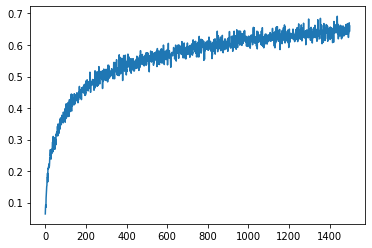

In [157]:
from matplotlib import pyplot

pyplot.plot(history.history['acc'])
pyplot.show()

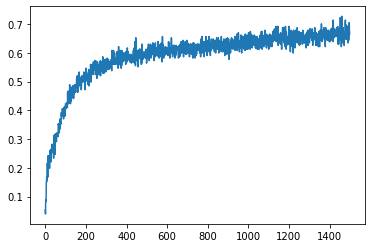

In [159]:
pyplot.plot(history.history['val_acc'])
pyplot.show()

# **Métricas de desempenho**

In [0]:
predicts = model.predict(x_test)
y_pred = (predicts > 0.5)

y_pred = np.argmax(y_pred, axis=1)

In [162]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.61      0.89      0.72        19
           1       1.00      0.93      0.97        15
           2       1.00      0.75      0.86        16
           3       0.93      0.93      0.93        15
           4       0.94      1.00      0.97        16
           5       1.00      1.00      1.00        17
           6       0.93      0.93      0.93        14
           7       0.95      1.00      0.98        20
           8       1.00      0.71      0.83         7
           9       0.94      1.00      0.97        17
          10       0.95      1.00      0.97        19
          11       1.00      0.75      0.86        20
          12       1.00      0.71      0.83        14
          13       0.86      1.00      0.92        18

    accuracy                           0.91       227
   macro avg       0.94      0.90      0.91       227
weighted avg       0.93      0.91      0.91       227

